In [1]:
%matplotlib inline


# Roget


Build a directed graph of 1022 categories and
5075 cross-references as defined in the 1879 version of Roget's Thesaurus
contained in the datafile roget_dat.txt. This example is described in
Section 1.2 in Knuth's book (see [1]_ and [2]_).

Note that one of the 5075 cross references is a self loop yet
it is included in the graph built here because
the standard networkx `DiGraph` class allows self loops.
(cf. 400pungency:400 401 403 405).

References
----------

.. [1] Donald E. Knuth,
   "The Stanford GraphBase: A Platform for Combinatorial Computing",
   ACM Press, New York, 1993.
.. [2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html



skipping self loop 400 400


Loaded roget_dat.txt containing 1022 categories.
digraph has 1022 nodes with 5075 edges
21 connected components


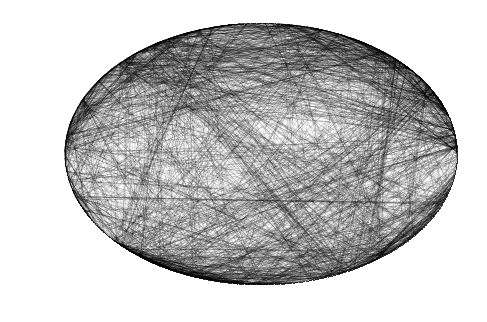

In [3]:
from __future__ import print_function

# Authors: Brendt Wohlberg, Aric Hagberg (hagberg@lanl.gov)
# Date: 2005-04-01 07:56:22 -0700 (Fri, 01 Apr 2005)

#    Copyright (C) 2004-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import gzip
import re
import sys

import matplotlib.pyplot as plt
from networkx import nx

def roget_graph():
    """ Return the thesaurus graph from the roget.dat example in
    the Stanford Graph Base.
    """
    # open file roget_dat.txt.gz (or roget_dat.txt)
    fh = gzip.open('roget_dat.txt.gz', 'r')

    G = nx.DiGraph()

    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue
        if line.startswith(" "):  # this is a continuation line, append
            line = oldline + line
        if line.endswith("\\\n"):  # continuation line, buffer, goto next
            oldline = line.strip("\\\n")
            continue

        (headname, tails) = line.split(":")

        # head
        numfind = re.compile("^\d+")  # re to find the number of this word
        head = numfind.findall(headname)[0]  # get the number

        G.add_node(head)

        for tail in tails.split():
            if head == tail:
                print("skipping self loop", head, tail, file=sys.stderr)
            G.add_edge(head, tail)

    return G


if __name__ == '__main__':
    G = roget_graph()
    print("Loaded roget_dat.txt containing 1022 categories.")
    print("digraph has %d nodes with %d edges"
          % (nx.number_of_nodes(G), nx.number_of_edges(G)))
    UG = G.to_undirected()
    print(nx.number_connected_components(UG), "connected components")

    options = {
        'node_color': 'black',
        'node_size': 1,
        'line_color': 'grey',
        'linewidths': 0,
        'width': 0.1,
    }
    nx.draw_circular(UG, **options)
    plt.show()